In [1]:
#Importing necessary libraries
import selenium
import pandas as pd
import time
from bs4 import BeautifulSoup

#Importing selenium webdriver
from selenium import webdriver

#Importing required Exceptions which need to be handled
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

#Importing requests
import requests

from selenium.webdriver.common.by import By

#Importing warnings
import warnings
warnings.filterwarnings("ignore")


#Q1.Write a python program which searches all the product under a particular product from www.amazon.in. The 
product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for 
guitars. 

In [2]:
driver = webdriver.Edge()

In [3]:
#Opening the required page on automated browser.
driver.get('https://www.amazon.in/')

In [4]:
#Entering the product to be searched as user input as required in the Question.
prod_in = input("Enter the product tobe searched: ")

Enter the product tobe searched: guitar


In [5]:
#Searching the product in product search bar.
product=driver.find_element(By.ID,"twotabsearchtextbox")
product.send_keys(prod_in)

In [6]:
#clicking the search button
search=driver.find_element(By.ID,"nav-search-submit-button")
search.click()

#Q2. In the above question, now scrape the following details of each product listed in first 3 pages of your search 
results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then 
scrape all the products available under that product name. Details to be scraped are: "Brand 
Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and 
“Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.

In [9]:
#fetching url to open each product.
product_opening_url=[]
start=0
end=3
for page in range(start,end):
    url=driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
    for i in url:
        product_opening_url.append(i.get_attribute('href'))
    next_button=driver.find_elements(By.XPATH,'/html/body/div[1]/div[2]/div[1]/div[1]/div/span[1]/div[1]/div[66]/div/div/span/a[3]')
   
    

In [8]:
print(len(product_opening_url))

183


In [10]:
#creating empty lists
brand_name=[]
name_product=[]
price=[]
return_exchange=[]
exp_delivery=[]
availability=[]
product_url=[]

In [11]:
#iterating each and every url to fetch all required data
for i in product_opening_url:
    driver.get(i)
    time.sleep(5)
    try:
        #scraping brand name from the required pages.
        brand=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[3]/div[4]/div[46]/div/table/tbody/tr[1]/td[2]/span')
        brand_name.append(brand.text)
        
        #scraping name of the product from the required pages.
        np=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[3]/div[4]/div[1]/div/h1/span')
        name_product.append(np.text)
        
        #scraping price from the required pages.
        p=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[3]/div[4]/div[12]/div[4]/div[1]/span[2]/span[2]/span[2]')
        price.append(p.text)
        
        #scraping return/exchange from the required pages.
        re=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[3]/div[4]/div[23]/div[2]/div/div/div/div[2]/div/ol/li[3]/div/span/div[2]/span')
        return_exchange.append(re.text)
        
        #scraping expected delivery from the required pages.
        ed=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[3]/div[1]/div[3]/div/div[1]/div/div/div/form/div/div/div/div/div[3]/div/div[2]/div[9]/div[1]/div/div/div/span/span[1]')
        exp_delivery.append(ed.text)
        
        #scraping availability from the required pages.
        avail=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[3]/div[1]/div[3]/div/div[1]/div/div/div/form/div/div/div/div/div[3]/div/div[4]/div/div[1]/span')
        availability.append(avail.text)
        
    except NoSuchElementException :
        brand_name.append('-')
        name_product.append('-')
        price.append('-')
        return_exchange.append('-')
        exp_delivery.append('-')
        availability.append('-')
        
    

In [15]:
brand_name1=brand_name[0:183]
name_product1=name_product[0:183]
price1=price[0:183]

In [16]:
print(len(brand_name1),len(name_product1),len(price1),len(return_exchange),len(exp_delivery),len(availability))

183 183 183 183 183 183


In [18]:
#creating dataframe
df1=pd.DataFrame({'Brand_Name':brand_name1,'Name_OF_Product':name_product1,'Price':price1,'Return_Exchange':return_exchange,'Expected_Delivery':exp_delivery,'Availability':availability,'Product_URL':product_opening_url})
df1

,Brand_Name,Name_OF_Product,Price,Return_Exchange,Expected_Delivery,Availability,Product_URL
0,Kadence,"Kadence rosewood Guitar Frontier Series, Elect...","4,999",7 days Replacement,"Thursday, 7 September",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,Kadence,Kadence Slowhand Premium Jumbo Semi Acoustic G...,"11,999",7 days Replacement,"Thursday, 7 September",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,Medellin,Medellin Acoustic Guitar (with guitar learning...,"2,499",7 days Replacement,"Thursday, 7 September",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3,VAULT,Vault Traveller 34 Inch Acoustic Guitar With T...,"4,299",7 days Replacement,"Thursday, 7 September",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
4,JUAREZ,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...","1,999",7 days Replacement,"Thursday, 7 September",In stock,https://www.amazon.in/Juarez-Acoustic-Cutaway-...
...,...,...,...,...,...,...,...
178,Kadence,Kadence A281 Professional Acoustic Rosewood gu...,"2,149",-,-,-,https://www.amazon.in/Juarez-Acoustic-Guitar-C...
179,YAMAHA,"Yamaha FS100C Acoustic Guitar, Black","4,899",7 days Replacement,"Thursday, 7 September",In stock,https://www.amazon.in/Medellin-Acoustic-Guitar...
180,-,-,"2,799",7 days Replacement,"Monday, 4 September",In stock,https://www.amazon.in/Carlton-Rosewood-Fretboa...
181,Intern,Intern INT-38C 38 Incheses basswood-BLS-G Cuta...,"2,139",7 days Replacement,"Thursday, 7 September",In stock,https://www.amazon.in/Kadence-Frontier-Acousti...


In [20]:
#saving into csv file.
df1.to_csv('WebScrap_guitar.csv')

#Q3. Write a python program to access the search bar and search button on images.google.com and scrape 10 
images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.

In [2]:
driver = webdriver.Edge()

In [3]:
#Opening the required page on automated browser.
driver.get('https://images.google.com/')

In [4]:
#Entering the keyword to be searched as required in the Question.
kword1=driver.find_element(By.CLASS_NAME,"gLFyf")
kword1.send_keys('fruits')

In [9]:
#clicking on search button
search=driver.find_element(By.CLASS_NAME,"zgAlFc")
search.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
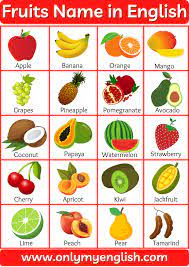
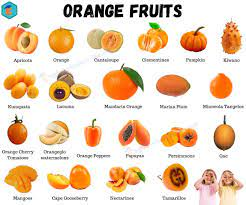
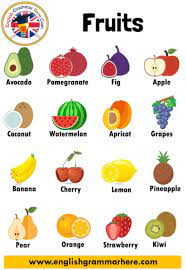
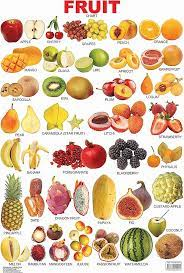
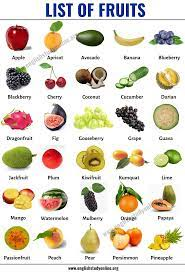
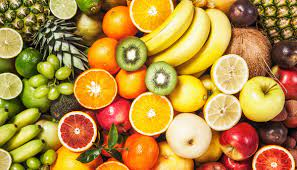
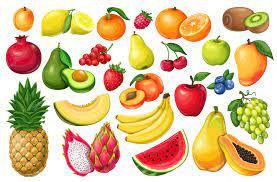
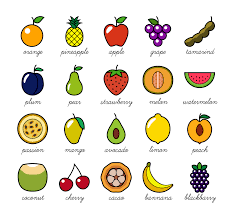
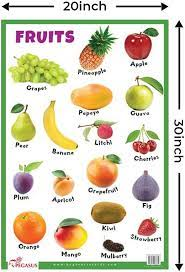
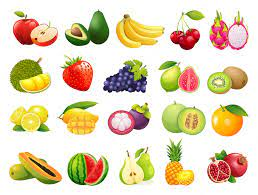

In [19]:
#scraping fruit images url
fruit_img=[]   #creating empty list
fruits=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
for i in fruits[0:10]:
    fruit_img.append(i.get_attribute('src'))
fruit_img


In [30]:
#initiating for next keyword search
driver = webdriver.Edge()
driver.get('https://images.google.com/')

In [32]:
#Entering the keyword to be searched as required in the Question.
kword2=driver.find_element(By.CLASS_NAME,"gLFyf")
kword2.send_keys('cars')

In [33]:
search=driver.find_element(By.CLASS_NAME,"zgAlFc")
search.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
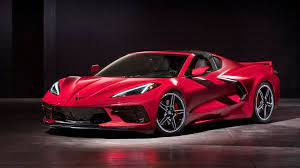
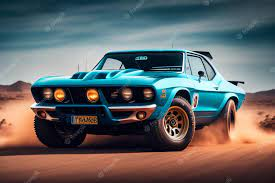
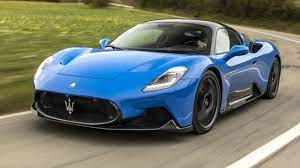
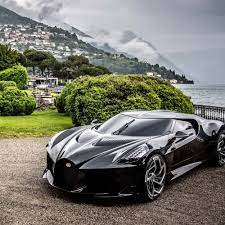
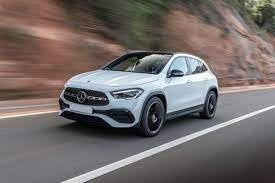
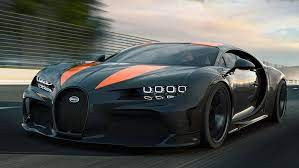
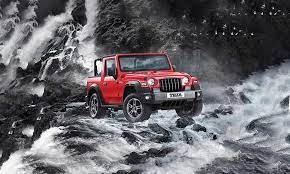
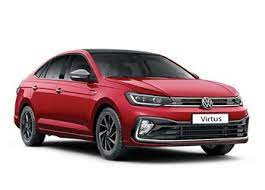
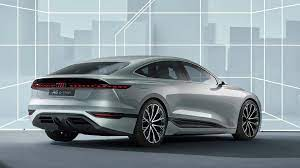
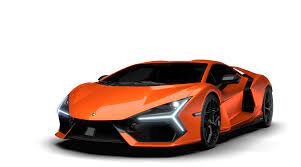

In [34]:
#scraping car images url
car_img=[]   #creating empty list
cars=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
for i in cars[0:10]:
    car_img.append(i.get_attribute('src'))
car_img

In [35]:
driver.close()

In [36]:
#initiating for next keyword search
driver = webdriver.Edge()
driver.get('https://images.google.com/')

In [37]:
#Entering the keyword to be searched as required in the Question.
kword3=driver.find_element(By.CLASS_NAME,"gLFyf")
kword3.send_keys('Machine Learning')

In [38]:
search=driver.find_element(By.CLASS_NAME,"zgAlFc")
search.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
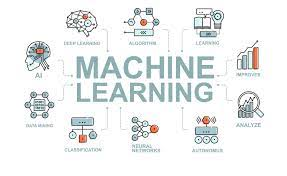
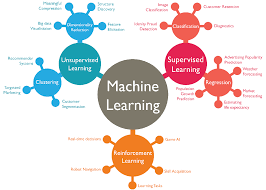
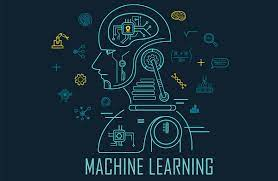
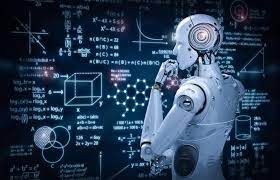
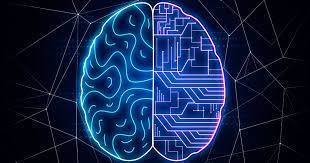
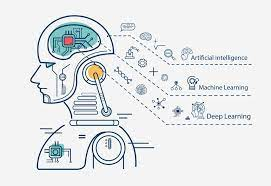
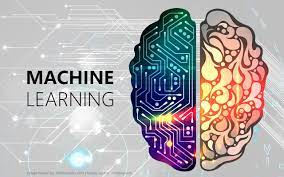
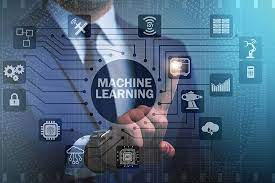
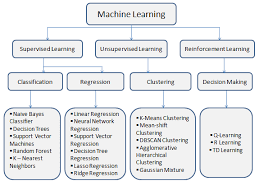
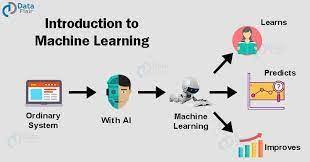

In [39]:
#scraping Machine learning images url
ml_img=[]   #creating empty list
ml=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
for i in ml[0:10]:
    ml_img.append(i.get_attribute('src'))
ml_img

In [42]:
driver.close()

In [43]:
#initiating for next keyword search
driver = webdriver.Edge()
driver.get('https://images.google.com/')

In [44]:
#Entering the keyword to be searched as required in the Question.
kword4=driver.find_element(By.CLASS_NAME,"gLFyf")
kword4.send_keys('Guitar')

In [45]:
search=driver.find_element(By.CLASS_NAME,"zgAlFc")
search.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
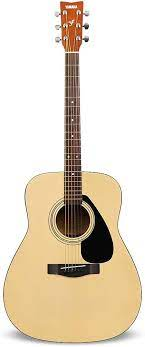
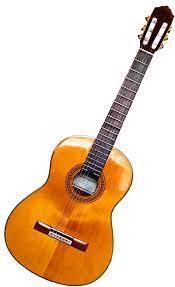
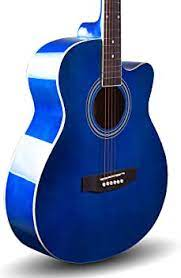
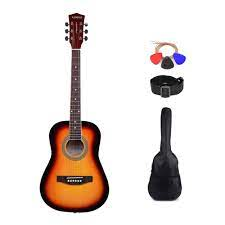
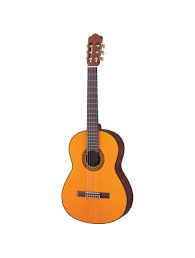
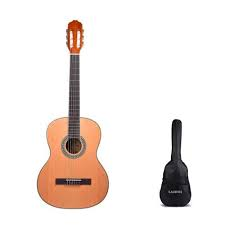
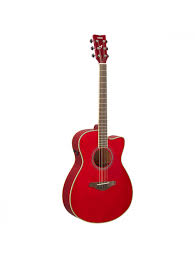
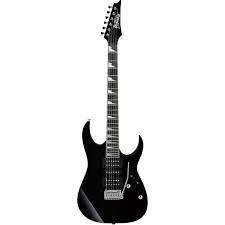
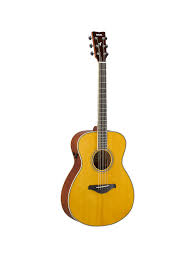
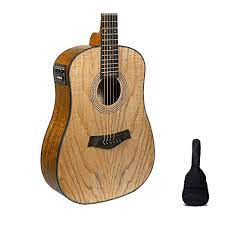

In [46]:
#scraping guitar images url
guitar_img=[]   #creating empty list
guitar=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
for i in guitar[0:10]:
    guitar_img.append(i.get_attribute('src'))
guitar_img

In [47]:
driver.close()

In [48]:
#initiating for next keyword search
driver = webdriver.Edge()
driver.get('https://images.google.com/')

In [49]:
#Entering the keyword to be searched as required in the Question.
kword4=driver.find_element(By.CLASS_NAME,"gLFyf")
kword4.send_keys('cakes')

In [50]:
search=driver.find_element(By.CLASS_NAME,"zgAlFc")
search.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
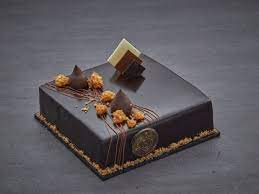
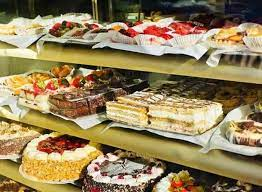
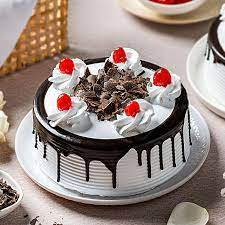
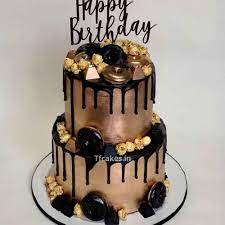
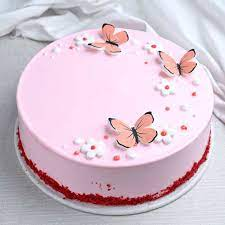
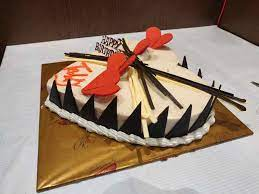
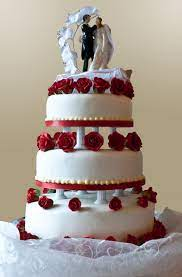
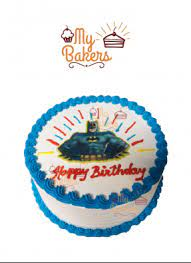
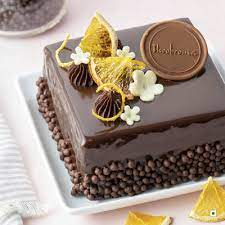
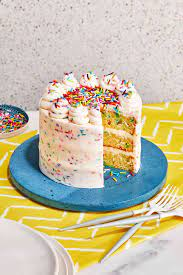

In [51]:
#scraping cake images url
cake_img=[]   #creating empty list
cake=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
for i in cake[0:10]:
    cake_img.append(i.get_attribute('src'))
cake_img

In [52]:
driver.close()

#Q4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com
and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand 
Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, 
“Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the 
details is missing then replace it by “- “. Save your results in a dataframe and CSV.

In [18]:
driver = webdriver.Edge()

In [19]:
#Opening the required page on automated browser.
driver.get('https://www.flipkart.com/')

In [20]:
#Searching the smartphone in product search bar.
phone=driver.find_element(By.CLASS_NAME,"Pke_EE")
phone.send_keys('Oneplus Nord')

In [21]:
#clicking the search button
search=driver.find_element(By.CLASS_NAME,"_2iLD__")
search.click()

In [22]:
#fetching url to open each product.
product_url=[]
start=0
end=1
for page in range(start,end):
    url1=driver.find_elements(By.XPATH,'//a[@class="_1fQZEK"]')
    for i in url1:
        product_url.append(i.get_attribute('href'))

In [23]:
print(len(product_url))

24


In [24]:
#creating empty lists
brd_sphone_name=[]
color=[]
ram=[]
rom=[]
pcam=[]
scam=[]
display=[]
bat_capacity=[]
price=[]


In [25]:
#iterating each and every url to fetch all required data
for i in product_url:
    driver.get(i)
    time.sleep(3)
    try:
        #scraping brand and phone name from the required page.
        brand1=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[2]/div/div[1]/h1/span')
        brd_sphone_name.append(brand1.text)
        
        #scraping color from the required page.
        col=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[8]/div[4]/div/div[2]/div[1]/div[1]/table/tbody/tr[4]/td[2]/ul/li')
        color.append(col.text)
        
        #scraping ram from the required page.
        ram1=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[8]/div[4]/div/div[2]/div[1]/div[4]/table/tbody/tr[2]/td[2]/ul/li')
        ram.append(ram1.text)
        
        #scraping rom from the required page.
        rom1=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[8]/div[4]/div/div[2]/div[1]/div[4]/table/tbody/tr[1]/td[2]/ul/li')
        rom.append(rom1.text)
        
        #scraping primary camera from the required page.
        cam1=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[8]/div[4]/div/div[2]/div[1]/div[5]/table/tbody/tr[1]/td[2]/ul/li')
        pcam.append(cam1.text)
        
        #scraping secondary camera from the required page.
        cam2=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[8]/div[4]/div/div[2]/div[1]/div[5]/table/tbody/tr[2]/td[2]/ul/li')
        scam.append(cam2.text)
        
        #scraping display size from the required page.
        dsize=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[7]/div[1]/div/div[2]/ul/li[2]')
        display.append(dsize.text)
        
        #scraping battery capacity from the required page.
        bcap=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[7]/div[1]/div/div[2]/ul/li[4]')
        bat_capacity.append(bcap.text)
        
        #scraping price from the required page.
        prc=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[2]/div/div[4]/div[1]/div/div[1]')
        price.append(prc.text)
        
    except NoSuchElementException :
        brd_sphone_name.append('-')
        color.append('-')
        ram.append('-')
        rom.append('-')
        pcam.append('-')
        scam.append('-')
        display.append('-')
        bat_capacity.append('-')
        price.append('-')
          

In [26]:
print(len(brd_sphone_name),len(color),len(ram),len(rom),len(pcam),len(scam),len(display),len(bat_capacity),len(price))

43 34 34 34 34 33 33 33 24


In [27]:
# Making data frame
phones=pd.DataFrame({})
phones['smartphone_name']=brd_sphone_name[:24]
phones['Color']=color[:24]
phones['RAM']=ram[:24]
phones['storage_ROM']=rom[:24]
phones['Pri_Camera']=pcam[:24]
phones['sec_Camera']=scam[:24]
phones['Display']=display[:24]
phones['battery_capacity']=bat_capacity[:24]
phones['Price']=price[:24]
phones['Product_URL']=product_url
phones

,smartphone_name,Color,RAM,storage_ROM,Pri_Camera,sec_Camera,Display,battery_capacity,Price,Product_URL
0,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB) ...",Blue Tide,,,,,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹17,650",https://www.flipkart.com/oneplus-nord-ce-2-lit...
1,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 128 GB)...",-,-,-,-,-,-,-,-,https://www.flipkart.com/oneplus-nord-ce-2-lit...
2,-,Misty Green,,,,,17.12 cm (6.74 inch) Display,5000 mAh Battery,"₹31,725",https://www.flipkart.com/oneplus-nord-3-5g-mis...
3,"OnePlus Nord 3 5G (Misty Green, 128 GB) (8 GB...",Tempest Gray,,,,,17.12 cm (6.74 inch) Display,5000 mAh Battery,"₹30,900",https://www.flipkart.com/oneplus-nord-3-5g-tem...
4,"OnePlus Nord 3 5G (Tempest Gray, 128 GB) (8 G...",Aqua Surge,,,,,17.02 cm (6.7 inch) Display,5000 mAh Battery,-,https://www.flipkart.com/oneplus-nord-ce3-5g-a...
5,"OnePlus Nord CE3 5G (Aqua Surge, 128 GB) (8 G...",-,-,-,-,-,-,-,"₹36,437",https://www.flipkart.com/oneplus-nord-3-5g-tem...
6,-,Tempest Gray,,,,,17.12 cm (6.74 inch) Display,5000 mAh Battery,"₹36,652",https://www.flipkart.com/oneplus-nord-3-5g-mis...
7,"OnePlus Nord 3 5G (Tempest Gray, 256 GB) (16 ...",Misty Green,,,,,17.12 cm (6.74 inch) Display,5000 mAh Battery,-,https://www.flipkart.com/oneplus-nord-ce3-5g-g...
8,"OnePlus Nord 3 5G (Misty Green, 256 GB) (16 G...",Grey Shimmer,,,,,17.02 cm (6.7 inch) Display,5000 mAh Battery,-,https://www.flipkart.com/oneplus-nord-2-5g-gra...
9,"OnePlus Nord CE3 5G (Grey Shimmer, 256 GB) (1...",-,-,-,-,-,-,-,-,https://www.flipkart.com/oneplus-nord-2-5g-gra...


In [28]:
#saving into csv file.
phones.to_csv('WebScrap_sphones1.csv')

#Q5.Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.

In [2]:
driver = webdriver.Edge()

In [3]:
#Opening the required page on automated browser.
driver.get('https://www.google.co.in/maps/@20.1899785,84.4372567,7z?entry=ttu')

In [4]:
#Searching a city in product search bar.
phone=driver.find_element(By.ID,"searchboxinput")
phone.send_keys('Delhi')

In [5]:
#clicking the search button
search=driver.find_element(By.ID,"searchbox-searchbutton")
search.click()

In [7]:
#getting the geospatial coordinates of Delhi city from google map
import re     #importing re module
url_string=driver.current_url
print("URL Extracted: ",url_string)
lat_lng=re.findall(r'@(.*)data',url_string)
lat_lng

URL Extracted:  https://www.google.co.in/maps/place/Delhi/@28.6436846,76.7635715,10z/data=!3m1!4b1!4m6!3m5!1s0x390cfd5b347eb62d:0x37205b715389640!8m2!3d28.7040592!4d77.1024902!16zL20vMDlmMDc?entry=ttu


['28.6436846,76.7635715,10z/']

In [15]:
string=lat_lng[0].split(',')
string

['28.6436846', '76.7635715', '10z/']

In [16]:
print("Latitude of Delhi is : ",string[0])
print("Longitude of Delhi is : ",string[1])

Latitude of Delhi is :  28.6436846
Longitude of Delhi is :  76.7635715


#Q6. Write a program to scrap all the available details of best gaming laptops from digit.in. 

In [13]:
driver = webdriver.Edge()

In [14]:
#Opening the required page on automated browser.
driver.get('https://www.digit.in/')

In [15]:
#clicking on best gaming laptops in india
search=driver.find_element(By.XPATH,"/html/body/div[7]/div/div[2]/div[2]/div[4]/ul/li[9]/a")
search.click()

In [16]:
#fetching url to open each product.
lap_url=[]
start=0
end=1
for page in range(start,end):
    url2=driver.find_elements(By.XPATH,'//span[@class="datahreflink"]')
    for i in url2:
        lap_url.append(i.get_attribute('data-href'))

In [17]:
print(len(lap_url))

9


In [18]:
lap_url

['https://www.digit.in/laptops/hp-omen-17-ck2008tx-13th-gen-core-i7-13700hx-price-346659.html',
 'https://www.digit.in/laptops/msi-gt77-titan-12uhs-054in-12th-gen-core-i9-12900hx-2022-price-330036.html',
 'https://www.digit.in/laptops/lenovo-legion-5i-pro-12th-gen-core-i7-12700h-82rf00e1in-price-346668.html',
 'https://www.digit.in/laptops/asus-rog-strix-scar-18-price-344598.html',
 'https://www.digit.in/laptops/acer-predator-helios-neo-16-13th-gen-core-i7-13700hx-phn16-71-price-346677.html',
 'https://www.digit.in/laptops/asus-rog-zephyrus-g14-ryzen-9-6900hs-ga402rjz-l4136ws-price-346686.html',
 'https://www.digit.in/laptops/msi-cyborg-15-12th-gen-core-i7-12650h-a12vf-205in-price-346695.html',
 'https://store.digit.in/store/',
 'https://store.digit.in/subscribe/']

In [19]:
#creating empty lists
lappy_name=[]
opr_sytm=[]
display=[]
procssor=[]
memory=[]
price=[]

In [20]:
#iterating each and every url to fetch all required data
for i in lap_url[0:7]:
    driver.get(i)
    time.sleep(3)
    try:
       #scraping laptop names.
        names=driver.find_element(By.XPATH,'/html/body/div[7]/div[2]/div[2]/h1')
        lappy_name.append(names.text)
        
       #scraping operating systems.
        os=driver.find_element(By.XPATH,'/html/body/div[7]/div[2]/div[3]/div[2]/div[3]/div/ul/li[1]/div/p[2]/strong')
        opr_sytm.append(os.text)
        
       #scraping display.
        dsply=driver.find_element(By.XPATH,'/html/body/div[7]/div[2]/div[3]/div[2]/div[3]/div/ul/li[2]/div/p[2]/strong')
        display.append(dsply.text)
       
       #scraping processor.
        prcsr=driver.find_element(By.XPATH,'/html/body/div[7]/div[2]/div[3]/div[2]/div[3]/div/ul/li[3]/div/p[2]/strong')
        procssor.append(prcsr.text)
        
       #scraping memory.
        mem=driver.find_element(By.XPATH,'/html/body/div[7]/div[2]/div[3]/div[2]/div[3]/div/ul/li[4]/div/p[2]/strong')
        memory.append(mem.text)
        
       #scraping price.
        prc=driver.find_element(By.XPATH,'/html/body/div[7]/div[2]/div[3]/div[2]/div[4]/div/h2/strong')
        price.append(prc.text)
        
    except NoSuchElementException :
        lappy_name.append('-')
        opr_sytm.append('-')
        display.append('-')
        procssor.append('-')
        memory.append('-')
        price.append('-')
        
    

In [21]:
print(len(lappy_name),len(opr_sytm),len(display),len(procssor),len(memory),len(price))

7 7 7 7 7 7


In [22]:
#creating dataframe
df6=pd.DataFrame({'Laptop_Name':lappy_name,'Operating_System':opr_sytm,'Display':display,'Processor':procssor,'Memory':memory,'Price':price})
df6

,Laptop_Name,Operating_System,Display,Processor,Memory,Price
0,HP Omen 17-ck2008TX 13th Gen Core i7-13700HX,Windows 11 Home,"17.3"" (2560 x 1440)",13th Gen Intel Core i7-13700HX | 5.0 GHz,1 TB SSD/16 GB DDR5,"₹ 269,777"
1,MSI GT77 Titan 12UHS-054IN 12th Gen Core i9-12...,Windows 11 Home,"17.3"" (3840 x 2160)",12th Gen Intel Core i9-12900HX | 3.6 GHz,2 TB SSD/64 GB DDR5,"₹ 499,990"
2,Lenovo Legion 5i Pro 12th Gen Core i7-12700H (...,Windows 11 Home,"16"" (2560 x 1600)",12th Gen Intel Core i7-12700H | 4.7 GHz,1 TB SSD/32 GB DDR5,"₹ 218,000"
3,ASUS ROG Strix Scar 18 G834JZ-N5041WS 13th Gen...,Windows 11 Home,"18"" (1920 x 1200)",13th Gen Intel Core i9-13980HX | 2.2 GHz,1 TB SSD/32 GB DDR5,"₹ 279,990"
4,Acer Predator Helios Neo 16 13th Gen Core i7-1...,Windows 11 Home,"16"" (2560 x 1600)",13th Gen Intel Core i7-13700HX | NA,1 TB SSD/16 GB DDR5,"₹ 149,990"
5,ASUS ROG Zephyrus G14 Ryzen 9-6900HS (GA402RJZ...,Windows 11 Home,"14"" (1920 x 1200)",AMD Ryzen 9-6900HS | 4.9 GHz,1 TB SSD/16 GB DDR5,"₹ 156,990"
6,MSI Cyborg 15 12th Gen Core i7-12650H (A12VF-2...,Windows 11 Home,"15.6"" (1920 x 1080)",12th Gen Intel Core i7-12650H | 4.7 GHz,1 TB SSD/16 GB DDR5,"₹ 130,990"


#Q7.Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: 
“Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”. 

In [2]:
driver = webdriver.Edge()

In [3]:
#Opening the required page on automated browser.
driver.get('https://www.forbes.com/')

In [4]:
#clicking on explore
explore=driver.find_element(By.CLASS_NAME,"_69hVhdY4")
explore.click()

In [5]:
#clicking on billionaire
billonr=driver.find_element(By.CLASS_NAME,"mpBfVZz3")
billonr.click()

In [6]:
#clicking on world billionaire
wbillonr=driver.find_element(By.XPATH,"/html/body/div[1]/header/nav/div[1]/div[1]/div/div[2]/ul/li[2]/div[2]/div[3]/ul/li[1]/a")
wbillonr.click()

In [16]:
rank=[]
name=[]
net_worth=[]
age=[]
ctzensip=[]
source=[]
industry=[]
new_list=[]

In [18]:
#scraping ranks from pages
start=0 
end=14
for page in range(start,end):
    try:
        rnk=driver.find_elements(By.XPATH,'//div[@class="Table_rank___YBhk Table_dataCell__2QCve"]')
        for i in rnk:
            rank.append(i.text)
        next_button=driver.find_element(By.XPATH,'/html/body/div[1]/div[2]/div[3]/div[2]/div[2]/div[2]/div[2]/div[2]/div[1]/button[2]/div/span[2]/svg/path[1]')
        next_button.click()
        time.sleep(2)
    except NoSuchElementException :
        rank.append('-')
        
#scraping names,age,source,industry from pages
start=0
end=14
for page in range(start,end):
    try:
        nl=driver.find_elements(By.XPATH,'//div[@class="Table_dataCell__2QCve"]')
        for i in nl:
            new_list.append(i.text)
        next_button=driver.find_element(By.XPATH,'/html/body/div[1]/div[2]/div[3]/div[2]/div[2]/div[2]/div[2]/div[2]/div[1]/button[2]/div/span[2]/svg/path[1]')
        next_button.click()
        time.sleep(2)
    except NoSuchElementException :
        new_list.append('-')
        
#scraping net worth from pages
start=0
end=14
for page in range(start,end):
    try:
        nw=driver.find_elements(By.XPATH,'//div[@class="Table_netWorth___L4R5 Table_dataCell__2QCve"]')
        for i in nw:
            net_worth.append(i.text)
        next_button=driver.find_element(By.XPATH,'/html/body/div[1]/div[2]/div[3]/div[2]/div[2]/div[2]/div[2]/div[2]/div[1]/button[2]/div/span[2]/svg/path[1]')
        next_button.click()
        time.sleep(2)
    except NoSuchElementException :
        net_worth.append('-') 
        

#scraping source from pages
start=0
end=14
for page in range(start,end):
    try:
        sorce=driver.find_elements(By.XPATH,'//div[@class="Table_dataCell__2QCve"]/span')
        for i in sorce:
            source.append(i.text)
        next_button=driver.find_element(By.XPATH,'/html/body/div[1]/div[2]/div[3]/div[2]/div[2]/div[2]/div[2]/div[2]/div[1]/button[2]/div/span[2]/svg/path[1]')
        next_button.click()
        time.sleep(2)
    except NoSuchElementException :
        source.append('-')
        

       

In [19]:
print(len(rank),len(new_list),len(net_worth),len(source))

2814 11214 2814 2814


In [20]:
rank[0:5]

['1', '2', '3', '4', '5']

In [21]:
net_worth[0:5]

['$211 B', '$180 B', '$114 B', '$107 B', '$106 B']

In [22]:
source[0:5]

['LVMH', 'Tesla, SpaceX', 'Amazon', 'Oracle', 'Berkshire Hathaway']

In [30]:
new_list[0:5]

['Bernard Arnault & family', '74', 'LVMH', '', 'Elon Musk']

In [26]:
#extracting names
for i in range(0,len(new_list)-1,4):
    name.append(new_list[i])
name[0:5]

['Bernard Arnault & family',
 'Elon Musk',
 'Jeff Bezos',
 'Larry Ellison',
 'Warren Buffett']

In [27]:
print(len(name))

2804


In [28]:
#extracting age
for i in range(0,len(new_list)-1,4):
    age.append(new_list[i+1])
age[0:5]

['74', '51', '59', '78', '92']

In [29]:
print(len(age))

2804


In [ ]:
#not able to find the correct class and tag for 'citizenship'.

#Q8.Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video.

In [2]:
driver = webdriver.Edge()

In [3]:
#Opening a youtube video on automated browser.
driver.get('https://www.youtube.com/watch?v=xC-c7E5PK0Y')

In [14]:
comment=[]
cmt_upvote=[]
cmt_time=[]

In [16]:
for _ in range(20):
    driver.execute_script("window.scrollBy(0,600)")
    
    #scraping comments 
    cmt=driver.find_elements(By.XPATH,'//div[@class="style-scope ytd-expander"]')
    for i in cmt[0:500]:
        comment.append(i.text)
    
    #scraping comment upvotes 
    upvote=driver.find_elements(By.XPATH,'//span[@id="vote-count-middle"]')
    for i in upvote[0:500]:
        cmt_upvote.append(i.text)  
    
    #scraping comments 
    time=driver.find_elements(By.XPATH,'//a[@class="yt-simple-endpoint style-scope yt-formatted-string"]')
    for i in time[0:500]:
        cmt_time.append(i.text)



In [17]:
print(len(comment),len(cmt_upvote),len(cmt_time))

3240 3200 3260


In [18]:
comment[0:10]

['',
 '',
 'As a current college student, I really appreciate the breakdown of the different roles and responsibilities for Data Science. Keep up the good work and I would love to learn more about DS.',
 "Days worth of knowledge compressed in 11 minutes. Why isn't the world of youtube more like you. Thank you Joma.",
 "Consistent nomenclature would be amazing, but startups are such havoc on that notion! Thanks for breaking down the startup vs midsize vs deep pocket lingo. It's easier to guess the actual role scope by company size and industry with a good breakdown like this.",
 'I wish I saw this 6 months ago! I\'ve been trying to transition careers from physics to "data science" and after not having much luck despite what I thought to be very similar methods used in my former career, now its becoming clear why my resume is getting nowhere... I\'ve focused on the top too much, haven\'t showcased my whole pyramid.  Thank you bro!',
 "Such a concise, easy to understand, and thorough expl

In [19]:
cmt_upvote[0:10]

['2K', '263', '39', '339', '37', '78', '645', '5', '4', '9']

In [20]:
cmt_time[0:10]

['Joma Tech',
 '',
 '5 years ago',
 '1 year ago',
 '9 months ago',
 '1 year ago',
 '2 years ago',
 '2 years ago',
 '4 years ago',
 '2 months ago']

#Q9. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in 
“London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall 
reviews, privates from price, dorms from price, facilities and property description. 

In [2]:
driver = webdriver.Edge()

In [3]:
#Opening the required page on automated browser.
driver.get('https://www.hostelworld.com/')

In [5]:
#Entering Location as required in the Question.
location=driver.find_element(By.XPATH,"/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[1]/div[1]/div/div[2]/input")
location.send_keys('London')

In [6]:
#clicking on london location
london_clk=driver.find_element(By.XPATH,"/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/ul/li[2]/button/div[2]/div[1]")
london_clk.click()

In [8]:
#clicking on search button
search=driver.find_element(By.XPATH,"/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[5]/button[1]/div")
search.click()

In [9]:
name_host=[]
distance=[]
rating=[]
tot_review=[]
ovall_review=[]
pvt_price=[]
dorm_price=[]
facility=[]
prop_descrip=[]
hostel_url=[]

In [10]:
#scraping hostel names from the given pages
start=0 
end=2
for page in range(start,end):
    try:
        names=driver.find_elements(By.XPATH,'//div[@class="property-name"]')
        for i in names:
            name_host.append(i.text)
        next_button=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div/div[2]/div[1]/div/div/div/div/div[6]/div/button[2]/div/svg/use')
        next_button.click()
        time.sleep(2)
    except NoSuchElementException :
        name_host.append('-')
        
#scraping hostel distance from city centre from the given pages
start=0 
end=2
for page in range(start,end):
    try:
        dist=driver.find_elements(By.XPATH,'//span[@class="distance-description"]')
        for i in dist:
            distance.append(i.text)
        next_button=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div/div[2]/div[1]/div/div/div/div/div[6]/div/button[2]/div/svg/use')
        next_button.click()
        time.sleep(2)
    except NoSuchElementException :
        distance.append('-')
        
#scraping hostel total review from the given page
start=0 
end=2
for page in range(start,end):
    try:
        rev=driver.find_elements(By.XPATH,'//div[@class="review"]')
        for i in rev:
            tot_review.append(i.text)
        next_button=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div/div[2]/div[1]/div/div/div/div/div[6]/div/button[2]/div/svg/use')
        next_button.click()
        time.sleep(2)
    except NoSuchElementException :
        tot_review.append('-')
        
#scraping hostel overall review from the given pages
start=0 
end=2
for page in range(start,end):
    try:
        orev=driver.find_elements(By.XPATH,'//span[@class="keyword"]')
        for i in orev:
            ovall_review.append(i.text)
        next_button=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div/div[2]/div[1]/div/div/div/div/div[6]/div/button[2]/div/svg/use')
        next_button.click()
        time.sleep(2)
    except NoSuchElementException :
        ovall_review.append('-')     
        
#scraping hostel privates from price from the given pages
start=0 
end=2
for page in range(start,end):
    try:
        price=driver.find_elements(By.XPATH,'//div[@class="accommodation-price unavailable"]')
        for i in price:
            pvt_price.append(i.text)
        next_button=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div/div[2]/div[1]/div/div/div/div/div[6]/div/button[2]/div/svg/use')
        next_button.click()
        time.sleep(2)
    except NoSuchElementException :
        pvt_price.append('-') 
        
#scraping hostel dorms from price from the given pages
start=0 
end=2
for page in range(start,end):
    try:
        dprice=driver.find_elements(By.XPATH,'//strong[@class="current"]')
        for i in dprice:
            dorm_price.append(i.text)
        next_button=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div/div[2]/div[1]/div/div/div/div/div[6]/div/button[2]/div/svg/use')
        next_button.click()
        time.sleep(2)
    except NoSuchElementException :
        dorm_price.append('-') 
        



In [11]:
print(len(name_host),len(distance),len(tot_review),len(ovall_review),len(pvt_price),len(dorm_price))

64 62 62 62 52 72


In [20]:
name_host[0:5]

["St Christopher's Village",
 "Wombat's City Hostel London",
 "St Christopher's Village",
 'NX London Hostel',
 'Urbany Hostel London']

In [21]:
distance[0:5]

['- 3.6km from city centre',
 '- 1.8km from city centre',
 '- 6.1km from city centre',
 '- 5.4km from city centre',
 '- 3km from city centre']

In [22]:
tot_review[0:5]

['(15295)', '(12395)', '(1939)', '(902)', '(7732)']

In [23]:
ovall_review[0:5]

['Fabulous', 'Superb', 'Fabulous', 'Very Good', 'Superb']

In [24]:
pvt_price[0:5]

['No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available']

In [25]:
dorm_price[:5]

['₹3,061', '₹1,746', '₹2,476', '₹3,207', '₹20,751']

In [13]:
#fetching urls to open each hostel.
start=0 
end=2
for page in range(start,end):
    url=driver.find_elements(By.XPATH,'//a[@class="nuxt-link"]')
    for i in url:
        hostel_url.append(i.get_attribute('href'))
    next_button=driver.find_elements(By.XPATH,'/html/body/div[3]/div/div/div[2]/div/div[2]/div[1]/div/div/div/div/div[6]/div/button[2]/div/svg/use')
    
                  

In [14]:
print(len(hostel_url))

93


In [15]:
hostel_url[0:5]

['https://www.hostelworld.com/pwa/hosteldetails.php/St-Christopher-s-Village/London/502?from=2023-09-11&to=2023-09-14&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Wombat-s-City-Hostel-London/London/88047?from=2023-09-11&to=2023-09-14&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/St-Christopher-s-Village/London/502?from=2023-09-11&to=2023-09-14&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/NX-London-Hostel/London/15204?from=2023-09-11&to=2023-09-14&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Urbany-Hostel-London/London/303427?from=2023-09-11&to=2023-09-14&guests=2']

In [16]:
#iterating each and every url to fetch rest of the required data.
for i in hostel_url:
    driver.get(i)
    time.sleep(2)
    try:
        #scraping description from required pages.
        descrip=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/section/div[9]/div/div[2]/div[4]/div/div[2]')
        prop_descrip.append(descrip.text)
        
        #scraping facilities from the required pages.
        fac=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/section/div[13]/div/ul/li[1]/ul/li[1]')
        facility.append(fac.text)
        
    except NoSuchElementException :
        prop_descrip.append('-')
        facility.append('-')
        

In [17]:
print(len(prop_descrip),len(facility))

96 93


In [18]:
prop_descrip[0:2]

['-',
 "A safe haven in the middle of the metropolis: We took a traditional brick building with roots dating back to the 1800s and set a new standard for hostel life in the UK.\nWhat was once sailors' accommodation is now a hostel that caters for all the needs of the modern traveller. With great attention to detail, we have created a hostel in London that celebrates the heritage of our historic building.\nThe old oak that once formed part of sturdy ships and churches is now immortalised in our furnishings throughout the house. The beers you drink here will be served on a bar made from 500 year old wood!\n\nOur Wombat's City Hostel is located in the London Borough of Tower Hamlets, right next to the famous Tower Bridge and Tower of London, charming markets, authentic pubs and many other places of historical interest.\nA short walk will take you to trendy Shoreditch with its vibrant street art, the lively nightlife of Hoxton Square and Old Street and finally Brick Lane, which has become 

In [19]:
facility[0:5]

['-', 'Linen Included', '-', 'Free Breakfast', 'Linen Included']